In [1]:
import pandas as pd

df = pd.read_csv(open('web-Stanford_small.txt'), skiprows=4, sep="\t", names=['FromNodeId', 'ToNodeId'])

In [2]:
df1 = df[['FromNodeId', 'ToNodeId']]
print(df1)

      FromNodeId  ToNodeId
0              2     17794
1              2     25202
2              2     53625
3              2     54582
4              2     64930
...          ...       ...
2986      181701    183004
2987      181701    183720
2988      181701    192719
2989      181701    205581
2990      181701    221087

[2991 rows x 2 columns]


In [3]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'FromNodeId', 'ToNodeId')

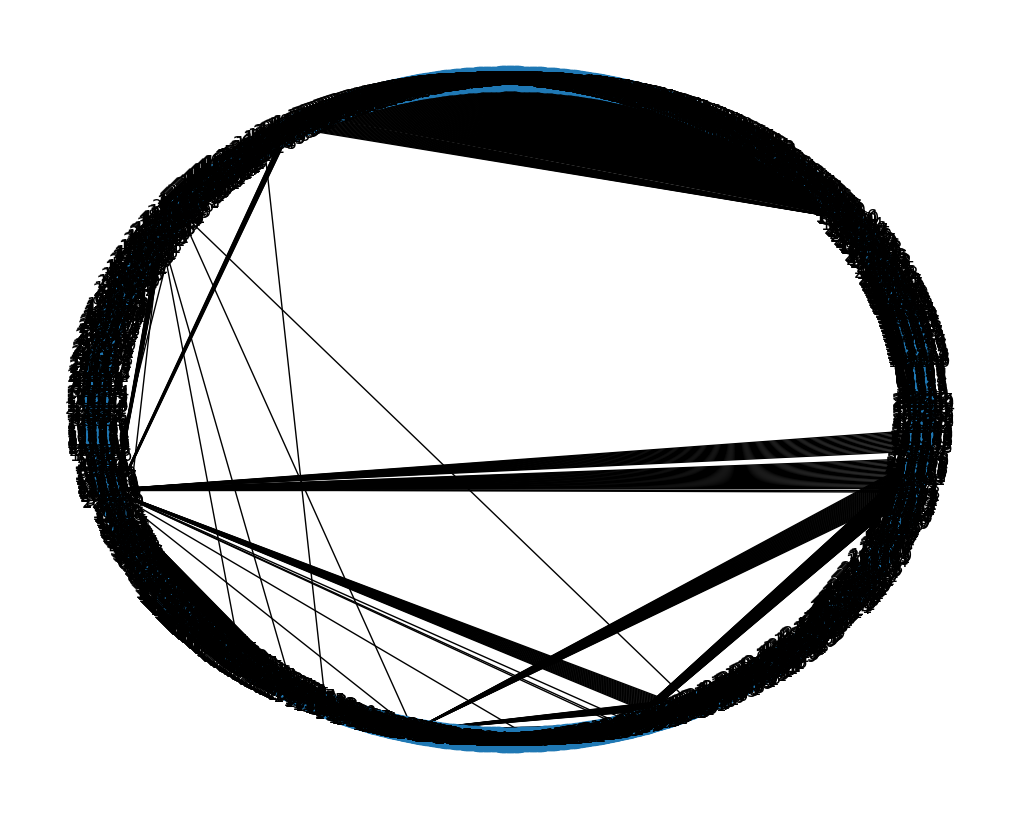

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [5]:
limit_prints = 10
_count = 0
for u in G.nodes():
    neighbors = nx.neighbors(G, u)
    if _count < limit_prints:
        print(f'{u}\t{list(neighbors)}')
        _count += 1

2	[17794, 25202, 53625, 54582, 64930, 73764, 84477, 98628, 100193, 102355, 105318, 105730, 115926, 140864, 163550, 164599, 175799, 178642, 181714, 190453, 204189, 204604, 210870, 213966, 225119, 241596, 243294, 246897, 251658, 252915, 280935]
17794	[2]
25202	[2]
53625	[2]
54582	[2]
64930	[2]
73764	[2]
84477	[2]
98628	[2]
100193	[2]


In [6]:
nodes_degree_0_or_1 = [x for x in G.nodes() if G.degree(x)==0 or G.degree(x)==1]

In [7]:
import numpy as np

def pagerank(M, num_iterations: int = 5, d: float = 0.8):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

In [8]:
page_ranks = nx.pagerank(G,  0.8)

In [9]:
print(dict(list(page_ranks.items())[:limit_prints]))

{2: 0.008917466509824265, 17794: 0.0003556418446915476, 25202: 0.0003556418446915476, 53625: 0.0003556418446915476, 54582: 0.0003556418446915476, 64930: 0.0003556418446915476, 73764: 0.0003556418446915476, 84477: 0.0003556418446915476, 98628: 0.0003556418446915476, 100193: 0.0003556418446915476}
